# 数据挖掘互评作业1：数据探索性分析与数据预处理  

## 学号：5720201116
## 姓名：邢晓宇

 本次作业选择处理的数据集为winedata与CrimeData
# 一.WineData
## 1.数据摘要

In [1]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import pandas as pd

# 读取数据

In [2]:
df = pd.read_csv("winemag-data_first150k.csv") 

# 数据信息
本数据集共有11列，150930行。8列为标称属性，3列为数值属性

In [3]:
print('%d columns' % len(df.columns))
print('%d rows' % len(df.index))
print()
print(df.dtypes.value_counts())

11 columns
150930 rows

object     8
int64      2
float64    1
dtype: int64


# 1.1标称属性摘要

定义summary_column(col_name)函数，统计标称属性col_name中不同值出现的频数和频率，并展示出现频率最高的前10个值。

In [4]:
def summary_column(col_name):
    col = df[col_name].value_counts()
    print('Colunm name:', col_name)
    print('%d different values.' % len(col))
    print()
    col = df[col_name].value_counts()
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(df))
    col_df.rename(columns={col_name: 'counts'}, inplace=True)
    print(col_df.iloc[:10])
    print('...')
    plt.bar(np.arange(10), col.iloc[:10])
    plt.title(col_name)
    plt.show()

对于“province”统计如下

Colunm name: province
455 different values.

                  counts  frequency
California         44508   0.294892
Washington          9750   0.064599
Tuscany             7281   0.048241
Bordeaux            6111   0.040489
Northern Spain      4892   0.032412
Mendoza Province    4742   0.031419
Oregon              4589   0.030405
Burgundy            4308   0.028543
Piedmont            4093   0.027119
Veneto              3962   0.026251
...


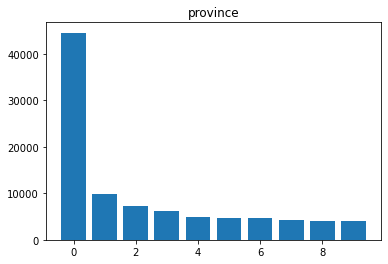

In [5]:
summary_column('province')

对于“designation”统计如下

Colunm name: designation
30621 different values.

                counts  frequency
Reserve           2752   0.018234
Reserva           1810   0.011992
Estate            1571   0.010409
Barrel sample     1326   0.008786
Riserva            754   0.004996
Barrel Sample      639   0.004234
Brut               624   0.004134
Crianza            503   0.003333
Estate Grown       449   0.002975
Estate Bottled     396   0.002624
...


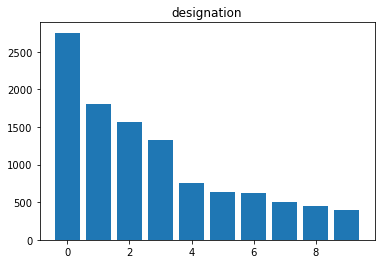

In [6]:
summary_column('designation')

# 1.2 数值属性摘要 

数据的第一列为id，可以忽略。对于数值属性“points”与“price”给出了五数概括。

In [7]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


每一列的缺失值如下：

In [8]:
df.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

# 2.数据可视化

使用直方图、盒图检查“points”与“price”的数据分布

## 直方图函数定义
定义函数distrib(col_name)，对指定数值属性列distrib(col_name)，展示其频率分布直方图

In [9]:
def distrib(col_name):
    col = df[col_name].dropna()
    plt.hist(col, 20)
    plt.title(col_name)
    plt.show()

## 盒图函数定义
定义函数boxplot(col_name)来为指定列绘制盒图。

In [10]:
def boxplot(col_name):
    fig, ax = plt.subplots(figsize=(5, 6))
    ax.set_title(col_name)
    ax.boxplot(df[col_name].dropna())
    plt.show()

## "price"数据的直方图与盒图

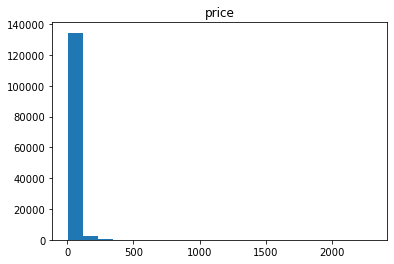

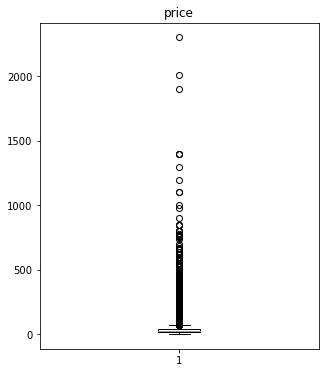

In [11]:
distrib('price')
boxplot('price')

## “points”数据的直方图与盒图

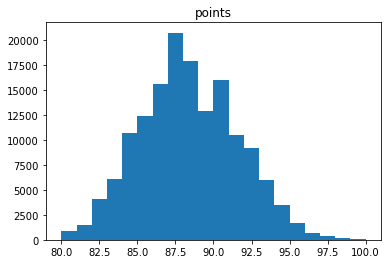

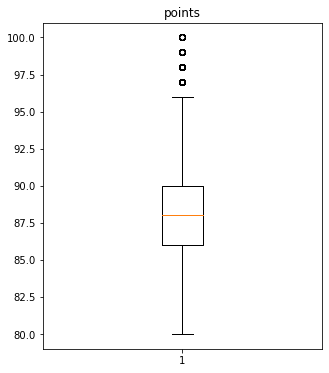

In [12]:
distrib('points')
boxplot('points')

# 3. 数据缺失的处理

分为标称数据缺失的处理与数值数据缺失的处理两部分
## 3.1 标称数据缺失的处理
designation列中共有150930个数据，其中45735个数据为空数据。

In [13]:
col_name = 'designation'
col = df[col_name]

print('colomn:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

colomn: designation
total: 150930
nan: 45735


定义函数`show_column(col)来展示数据。

In [14]:
def show_column(col):
    col = col.value_counts()
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(col))
    col_df.rename(columns={'designation': 'counts'}, inplace=True)
    print(col_df.iloc[:15])
    print('...')
    plt.bar(np.arange(15), col.iloc[:15])
    plt.title(col_name)
    plt.show()

删除designation列中的空数据，结果统计如下。

                counts  frequency
Reserve           2752   0.089873
Reserva           1810   0.059110
Estate            1571   0.051305
Barrel sample     1326   0.043304
Riserva            754   0.024624
Barrel Sample      639   0.020868
Brut               624   0.020378
Crianza            503   0.016427
Estate Grown       449   0.014663
Estate Bottled     396   0.012932
Dry                374   0.012214
Old Vine           331   0.010810
Gran Reserva       330   0.010777
Brut Rosé          248   0.008099
Extra Dry          244   0.007968
...


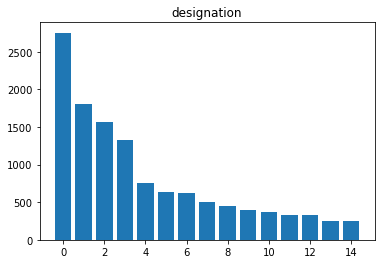

In [15]:
col_2 = col.dropna()
show_column(col_2)

将designation列中的空数据替换为出现频率最高的数据，结果统计如下。

                counts  frequency
Reserve          48487   1.583456
Reserva           1810   0.059110
Estate            1571   0.051305
Barrel sample     1326   0.043304
Riserva            754   0.024624
Barrel Sample      639   0.020868
Brut               624   0.020378
Crianza            503   0.016427
Estate Grown       449   0.014663
Estate Bottled     396   0.012932
Dry                374   0.012214
Old Vine           331   0.010810
Gran Reserva       330   0.010777
Brut Rosé          248   0.008099
Extra Dry          244   0.007968
...


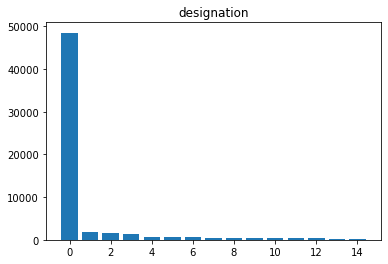

In [17]:
col_2 = col.fillna(col.mode()[0])
show_column(col_2)

## 3.2 数值数据缺失的处理

定义函数show_plot(col)和show_describe(col)来展示数据的信息。

In [18]:
def show_plot(col):
    plt.hist(col, 20)
    plt.title('bar')
    plt.show()
       
def show_describe(col):
    print(col.describe())

price列中共有150930个数据，其中13695个数据为空数据。

In [19]:
col_name = 'price'
col = df[col_name]

print('colomn:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

colomn: price
total: 150930
nan: 13695


去除price列的空数据后，结果如下：

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


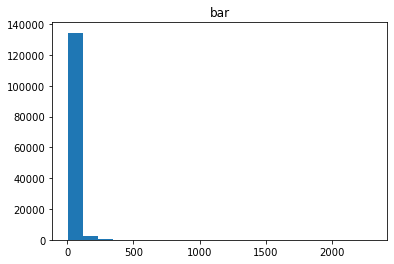

In [20]:
col_1 = col.dropna()
show_describe(col_1)
show_plot(col_1)

将price列中的空数据用出现频率最高的数替代，结果如下：

count    150930.000000
mean         31.939966
std          34.840211
min           4.000000
25%          16.000000
50%          22.000000
75%          38.000000
max        2300.000000
Name: price, dtype: float64


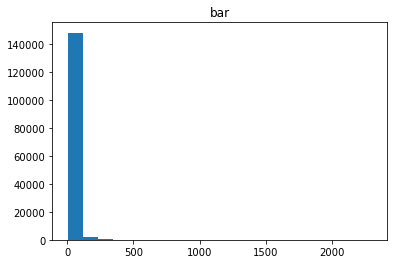

In [21]:
col_2 = col.fillna(col.mode()[0])
show_describe(col_2)
show_plot(col_2)

## 二.  CrimeData

加载数据

In [22]:
df=pd.read_csv('records-for-2015.csv')

# 1.数据摘要
## 1.1 数据信息
数据集中共有十列，192581行，9列标称属性，1列是数值属性

In [23]:
print('%d columns' % len(df.columns))
print('%d rows' % len(df.index))
print()
print(df.dtypes.value_counts())

10 columns
192581 rows

object    9
int64     1
dtype: int64


# 缺失值统计
统计每一列的缺失值如下：

In [24]:
df.isna().sum()

Agency                          0
Create Time                     0
Location                        0
Area Id                         0
Beat                         1325
Priority                        0
Incident Type Id                0
Incident Type Description     243
Event Number                    0
Closed Time                     0
dtype: int64

# 1.2数值数据摘要
本数据集只有一列数值数据，因此对于“priority”进行五数概括。

In [25]:
df.describe()

,Priority
count,192581.000000
mean,1.779729
std,0.414443
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


## 1.3 标称数据摘要
定义summary_column(col_name)函数，统计标称属性col_name中不同值出现的频数和频率，并以直方图的形式展示出现频率最高的前10个值。

In [26]:
def summary_column(col_name):
    col = df[col_name].value_counts()
    print('Colunm name:', col_name)
    print('%d different values.' % len(col))
    print()
    col = df[col_name].value_counts()
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(col))
    col_df.rename(columns={col_name:'counts'}, inplace=True)
    print(col_df.iloc[:10])
    print('...')
    plt.bar(np.arange(10),col.iloc[:10])
    plt.title(col_name)
    plt.show()

统计Location列如下。

Colunm name: Location
36515 different values.

                            counts  frequency
 INTERNATIONAL BLVD           3695   0.101191
 AV&INTERNATIONAL BLVD        3106   0.085061
 MACARTHUR BLVD               3105   0.085034
 BROADWAY                     2407   0.065918
 FOOTHILL BLVD                1753   0.048008
 7TH ST                       1569   0.042969
 TELEGRAPH AV                 1507   0.041271
 FRUITVALE AV                 1354   0.037081
 AV&MACARTHUR BLVD            1336   0.036588
 ST&BROADWAY                  1264   0.034616
...


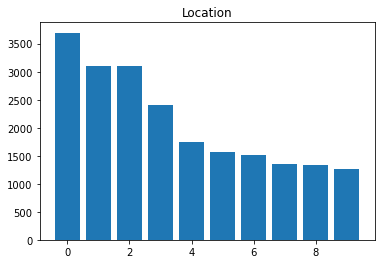

In [27]:
summary_column('Location')

统计Beat列如下。

Colunm name: Beat
58 different values.

     counts   frequency
04X    8048  138.758621
08X    6874  118.517241
30Y    5690   98.103448
19X    5564   95.931034
30X    5542   95.551724
23X    5492   94.689655
26Y    5449   93.948276
34X    5172   89.172414
06X    5056   87.172414
03X    4983   85.913793
...


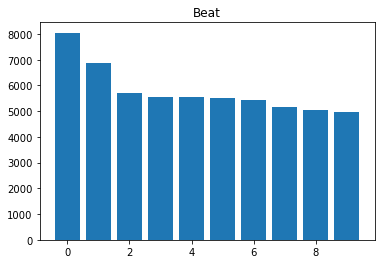

In [28]:
summary_column('Beat')

统计Incident Type Description列如下。

Colunm name: Incident Type Description
261 different values.

                      counts  frequency
ALARM-RINGER           18181  69.659004
SECURITY CHECK         14809  56.739464
STOLEN VEHICLE          8899  34.095785
911 HANG-UP             8529  32.678161
MENTALLY ILL            8465  32.432950
DISTURBING THE PEACE    8154  31.241379
BATTERY                 5960  22.835249
415 UNKNOWN             5607  21.482759
SUSPICIOUS PERSON       5211  19.965517
SUSPICIOUS VEHICLE      4476  17.149425
...


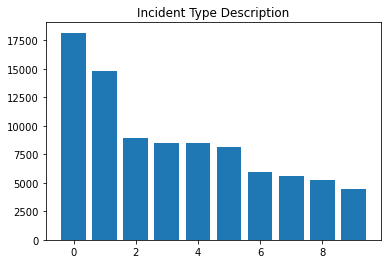

In [29]:
summary_column('Incident Type Description')

# 2.处理缺失标称数据

定义函数show_column(col)来展示数据

In [30]:
def show_column(col):
    col = col.value_counts()
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(col))
    print(col_df.iloc[:15])
    print('...')
    plt.bar(np.arange(15), col.iloc[:15])
    plt.title(col_name)
    plt.show()

Beat列中共有192581个数据，其中1325个数据为空数据。

In [31]:
col_name = 'Beat'
col = df[col_name]

print('colomn:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

colomn: Beat
total: 192581
nan: 1325


删除Beat列中的空数据，结果统计如下。

     Beat   frequency
04X  8048  138.758621
08X  6874  118.517241
30Y  5690   98.103448
19X  5564   95.931034
30X  5542   95.551724
23X  5492   94.689655
26Y  5449   93.948276
34X  5172   89.172414
06X  5056   87.172414
03X  4983   85.913793
07X  4910   84.655172
29X  4599   79.293103
31Y  4556   78.551724
25X  4409   76.017241
35X  4287   73.913793
...


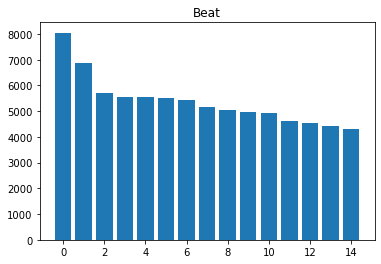

In [33]:
col_1=col.dropna()
show_column(col_1)

Incident Type Description列中共有192581个数据，其中243个数据为空数据。

In [34]:
col_name = 'Incident Type Description'
col = df[col_name]

print('colomn:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

colomn: Incident Type Description
total: 192581
nan: 243


删除designation列中的空数据，结果统计如下。

                      Incident Type Description  frequency
ALARM-RINGER                              18181  69.659004
SECURITY CHECK                            14809  56.739464
STOLEN VEHICLE                             8899  34.095785
911 HANG-UP                                8529  32.678161
MENTALLY ILL                               8465  32.432950
DISTURBING THE PEACE                       8154  31.241379
BATTERY                                    5960  22.835249
415 UNKNOWN                                5607  21.482759
SUSPICIOUS PERSON                          5211  19.965517
SUSPICIOUS VEHICLE                         4476  17.149425
BATTERY ON CO-HABITA                       4295  16.455939
415 FAMILY                                 4122  15.793103
HAZARDOUS SITUATION/                       3813  14.609195
WELFARE CHECK -- CHE                       3591  13.758621
415 GUNSHOTS                               3388  12.980843
...


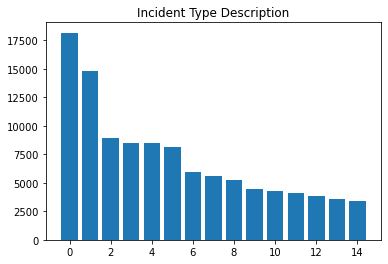

In [35]:
col_1 = col.dropna()
show_column(col_1)